# CNN Filters

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import imageio as imageio
import torch
import torch.nn as nn
from   torchinfo    import summary  

## Load image

C:\Users\Admin\AppData\Local\Temp\ipykernel_23236\1065893253.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread("images/yoga.jpg")


(128, 256, 3)
(128, 256)


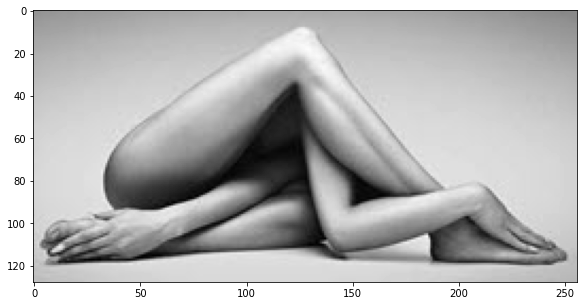

In [21]:
im = imageio.imread("images/yoga.jpg")
print(im.shape)                         # (128, 256, 3)
im = im.mean(axis=2)                    # averaging "color" channels
print(im.shape)                         # image size (128, 256)

plt.figure(figsize=(10, 5))             
plt.imshow(im, cmap="gray");            # display image

## One filter

torch.Size([1, 128, 256])


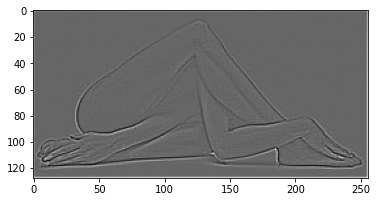

In [22]:
conv = nn.Conv2d(1,1,  kernel_size=3,  bias=False, padding=1)

kernel = [[-1.,-1.,-1.],                # border selection filter
          [-1.,+8.,-1.],
          [-1.,-1.,-1.]] 

im_tensor = torch.tensor(im.reshape( (1,)+im.shape)).float()
print(im_tensor.shape)

with torch.no_grad():                   # set the weights and pass the image through the layer
    conv.weight.copy_( torch.tensor(kernel) )    
    im1 = conv(im_tensor)        

plt.imshow(im1.numpy().reshape(im.shape), cmap="gray")
plt.show()

## Six filters

Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)


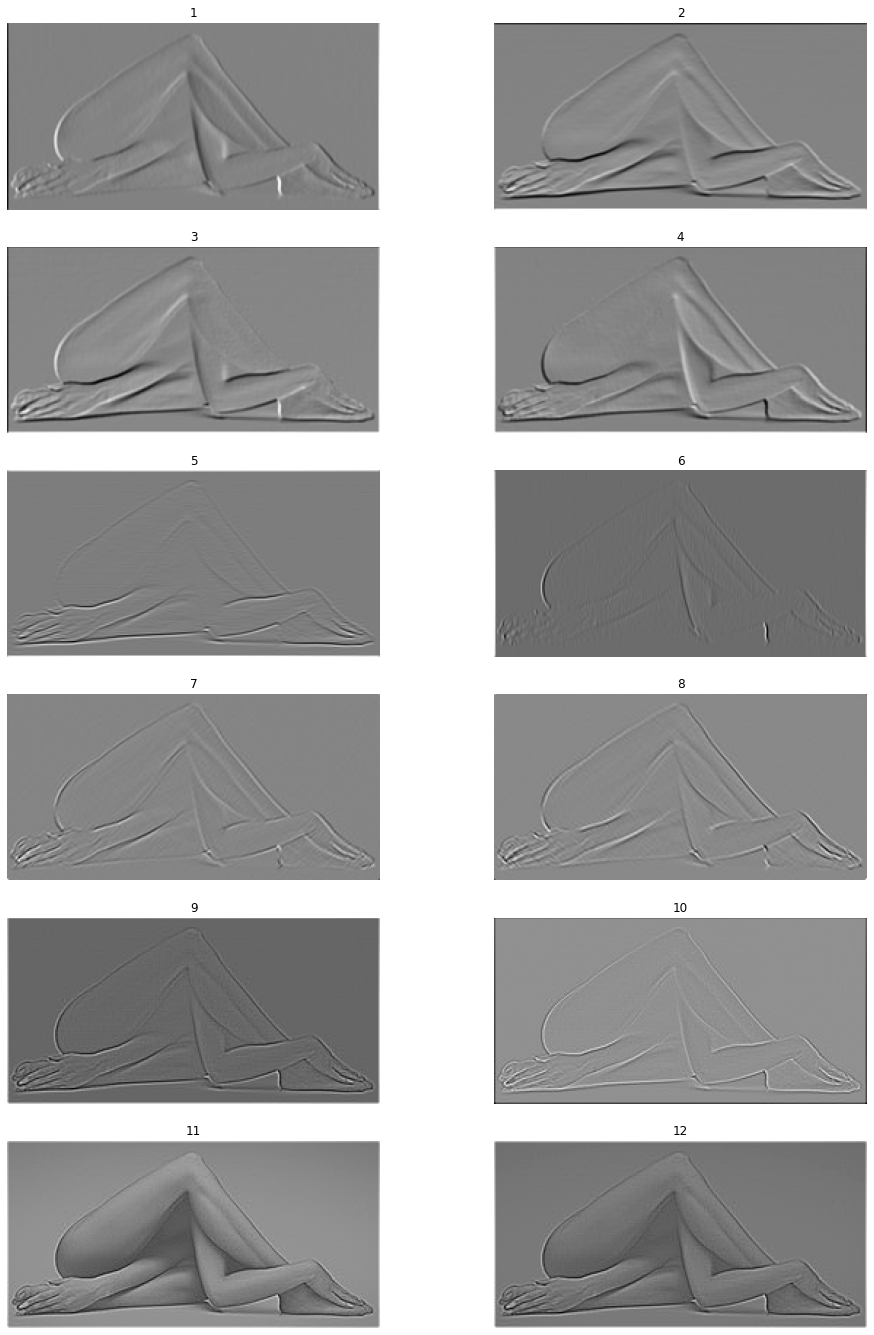

In [31]:
conv = nn.Conv2d(1,1,  kernel_size=3,  bias=False, padding=1)
print( conv ) 

filters = [    
[ 
 1, 0,-1,
 2, 0,-2,
 1, 0,-1 
],
[
 1, 2, 1,
 0, 0, 0,
-1,-2,-1,
],
[
 2, 1, 0,
 1, 0,-1,
 0,-1,-2,
],
[
 0, 1, 2,
-1, 0, 1,
-2,-1, 0,
],
# Line
[ 
-1,-1,-1,
 2, 2, 2,
-1,-1,-1 
],
[
-1, 2,-1,
-1, 2,-1,
-1, 2,-1,
],
[
-1,-1, 2,
-1, 2,-1,
 2,-1,-1,
],
[
 2,-1,-1,
-1, 2,-1,
-1,-1, 2,
],    
# Ridge detection
[
-1,-1,-1, 
-1, 8,-1,
-1,-1,-1
],   
# Laplas
[
 0, 1, 0,        
 1,-4, 1,
 0, 1, 0
],   
# Sharpen1
[ 
 0,-1, 0,    
-1, 5,-1,
 0,-1, 0,   
],
# Sharpen2
[ 
-1,-1,-1,    
-1, 9,-1,
-1,-1,-1
],       
]
    
    


plt.figure(figsize=(16, 2*len(filters)))      
for i, f in enumerate(filters):    
    plt.subplot(len(filters) // 2, 2, i + 1)
    plt.title(f"{i+1}")
    with torch.no_grad():
        f = torch.tensor(filters[i]).view(3,3)        
        conv.weight.copy_(f)
        #print(f)
        #print(im.shape)
        im1 = conv(torch.tensor(im.reshape( (1,)+im.shape), dtype=torch.float32 ))    
        plt.axis("off")

        plt.imshow(im1.numpy().reshape(im.shape), cmap="gray")
plt.show()

In [13]:
conv = nn.LazyConv2d(3, kernel_size=2, stride=1)
print(conv)
print( conv.weight)

LazyConv2d(0, 3, kernel_size=(2, 2), stride=(1, 1))
<UninitializedParameter>


## Pooling

In [6]:
X = torch.tensor( [[
                     [
                         [0,1,5],
                         [0,1,0],
                         [2,1,3],
                     ],
                                       [
                         [0,1,7],
                         [0,1,0],
                         [8,1,2],
                     ], 
                  ]], dtype=torch.float32)

pool = nn.MaxPool2d(2, 1)
pool(X)

tensor([[[[1., 5.],
          [2., 3.]],

         [[1., 7.],
          [8., 2.]]]])

In [7]:
conv = nn.Conv2d(2,5,  kernel_size=3,  bias=False, padding=0)
print(conv(X))

conv.weight.shape

tensor([[[[-0.2215]],

         [[-0.0190]],

         [[ 0.0191]],

         [[ 1.2093]],

         [[-0.2254]]]], grad_fn=<ConvolutionBackward0>)


torch.Size([5, 2, 3, 3])

## AdaptiveAvgPool2d

In [10]:
m = nn.AdaptiveAvgPool2d( (2,3) )
input = torch.randn(1, 16, 32, 64)
output = m(input)                   # shape: (1, 16, 2, 3)
print(output.shape)

torch.Size([1, 16, 2, 3])


## AdaptiveAvgPool1d

In [ ]:
m = nn.AdaptiveAvgPool1d((3,))
x = torch.tensor([[1,2,3,4,5,6]]).float()
y = m(x)      # tensor([[1.5000, 3.5000, 5.5000]])
print(y)         

## Conv2d numpy

In [11]:
h, w, k = 8, 8, 3                      # width, heigth, kernel

img = np.zeros((h, w))                 # image
img[: h//2, : w//2] = 1                # 4 chess cells
img[h//2:,  w//2 :] = 1
res = np.empty((h-k+1, w-k+1))         # result image

weight = np.array( [ [1,0,-1], [1,0,-1], [1,0,-1] ] ) # Sobel filter

for i in range(h-k+1):
    for j in range(w-k+1):
        res[i, j] = (weight * img[i: i+k, j: j+k]).sum()

print(img)
print(res)

[[1. 1. 1. 1. 0. 0. 0. 0.]
 [1. 1. 1. 1. 0. 0. 0. 0.]
 [1. 1. 1. 1. 0. 0. 0. 0.]
 [1. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 1. 1. 1. 1.]]
[[ 0.  0.  3.  3.  0.  0.]
 [ 0.  0.  3.  3.  0.  0.]
 [ 0.  0.  1.  1.  0.  0.]
 [ 0.  0. -1. -1.  0.  0.]
 [ 0.  0. -3. -3.  0.  0.]
 [ 0.  0. -3. -3.  0.  0.]]


## BatchNorm2d

In [16]:
im = torch.tensor([ [ [[1,2],
                       [2,1]],  
                      [[1,1],
                       [1,1]],
                      [[0,0],
                       [0,0]],
                    ],          
                  ]).float()
print(im.shape)
print(im.mean((0,2,3)))
print(im.var((0,2,3)))

bn = nn.BatchNorm2d(num_features=3) 

print("--------------------------------")
print(bn(im))

print("--------------------------------")

for n, p in bn.state_dict().items():
    print(f'{n:20s} : {tuple(p.shape)} {p.requires_grad} {p.data}')
    
for n, p in bn.named_parameters():    
    print(f"{n:10s} : {tuple(p.shape)}, {p.requires_grad}, {p.data}")    

torch.Size([1, 3, 2, 2])
tensor([1.5000, 1.0000, 0.0000])
tensor([0.3333, 0.0000, 0.0000])
--------------------------------
tensor([[[[-1.0000,  1.0000],
          [ 1.0000, -1.0000]],

         [[ 0.0000,  0.0000],
          [ 0.0000,  0.0000]],

         [[ 0.0000,  0.0000],
          [ 0.0000,  0.0000]]]], grad_fn=<NativeBatchNormBackward0>)
--------------------------------
weight               : (3,) False tensor([1., 1., 1.])
bias                 : (3,) False tensor([0., 0., 0.])
running_mean         : (3,) False tensor([0.1500, 0.1000, 0.0000])
running_var          : (3,) False tensor([0.9333, 0.9000, 0.9000])
num_batches_tracked  : () False 1
weight     : (3,), True, tensor([1., 1., 1.])
bias       : (3,), True, tensor([0., 0., 0.])


In [ ]:
"""
                    [ [[0,0],
                       [0,0]],
                      [[0,0],
                       [0,0]],
                      [[0,0],
                       [0,0]] 
                    ],                  
"""                             